# Logistic Regression Project: Heart Disease Prediction


## Dataset Used

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### 1. **Importing Libraries**
We begin by importing the necessary Python libraries for data manipulation, visualization, and machine learning.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc


### **2. Loading and Exploring Data**


In [8]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [16]:
# Display statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std  

### 📊 Feature-wise Analysis

---

#### 🔸 `age`
- **Mean:** ~54.4 years  
- **Range:** 29 to 77 years  
- Most individuals are middle-aged to elderly.

---

#### 🔸 `sex`
- Encoded as **0** and **1**  
- **Mean:** ~0.68  
- Around **68% are male (1)** and **32% are female (0)**.

---

#### 🔸 `cp` *(chest pain type)*
- Ranges from **0 to 3** *(likely categorical values)*  
- **Mean:** ~0.97  
- Chest pain type **1** appears to be the most common.

---

#### 🔸 `trestbps` *(resting blood pressure)*
- **Mean:** ~131.6 mm Hg  
- **Range:** 94 to 200 mm Hg  
- Some individuals have **high resting BP**.

---

#### 🔸 `chol` *(cholesterol)*
- **Mean:** ~246.3 mg/dL  
- **Range:** Up to 564 mg/dL  
- Values over **200 mg/dL** are considered high → many individuals likely have **elevated cholesterol**.

---

#### 🔸 `fbs` *(fasting blood sugar > 120 mg/dL)*
- Binary (0/1)  
- **Mean:** ~0.15  
- Only **15% have high fasting blood sugar**.

---

#### 🔸 `restecg` *(resting ECG results)*
- Categorical (0 to 2)  
- **Mean:** ~0.53  
- Most values fall in **category 0**.

---

#### 🔸 `thalach` *(maximum heart rate achieved)*
- **Mean:** ~150 bpm  
- **Range:** 71 to 202  
- Indicates **diverse cardiovascular fitness** among individuals.

---

#### 🔸 `exang` *(exercise-induced angina)*
- Binary (0/1)  
- **Mean:** ~0.33  
- About **33% experienced angina** during exercise.

---

#### 🔸 `oldpeak` *(ST depression induced by exercise)*
- **Mean:** ~1.04  
- **Max:** 6.2  
- Some individuals show **significant ST depression**, which could indicate **heart issues**.

---

#### 🔸 `slope` *(slope of ST segment)*
- Categorical (0 to 2)  
- **Mean:** ~1.4  
- Most values likely fall into **category 1 or 2**.

---

#### 🔸 `ca` *(number of major vessels colored by fluoroscopy)*
- **Range:** 0 to 4  
- Higher values may indicate **more severe conditions**.

---

#### 🔸 `thal`
- Categorical (0 to 3)  
- **Mean:** ~2.3  
- Likely represents types of defects: **normal, fixed, reversible**.

---

#### 🔸 `target` *(presence of heart disease)*
- **Mean:** ~0.54  
- About **54% of individuals have heart disease** (target = 1).


## **3. Exploratory Data Analysis**

<Axes: xlabel='target', ylabel='count'>

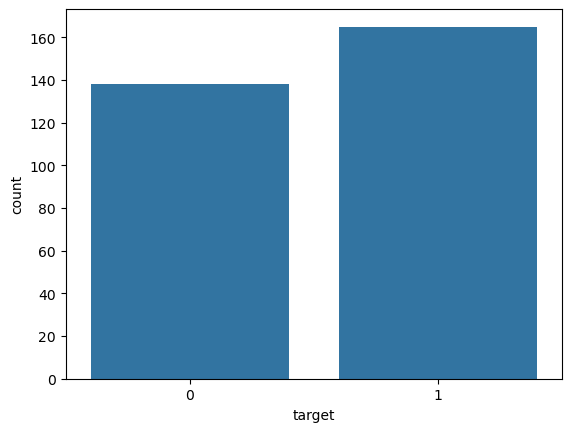

In [23]:
sns.countplot(x='target',data=df)

In [25]:
# Running a pairplot on everything can take a very long time due to the number of features

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

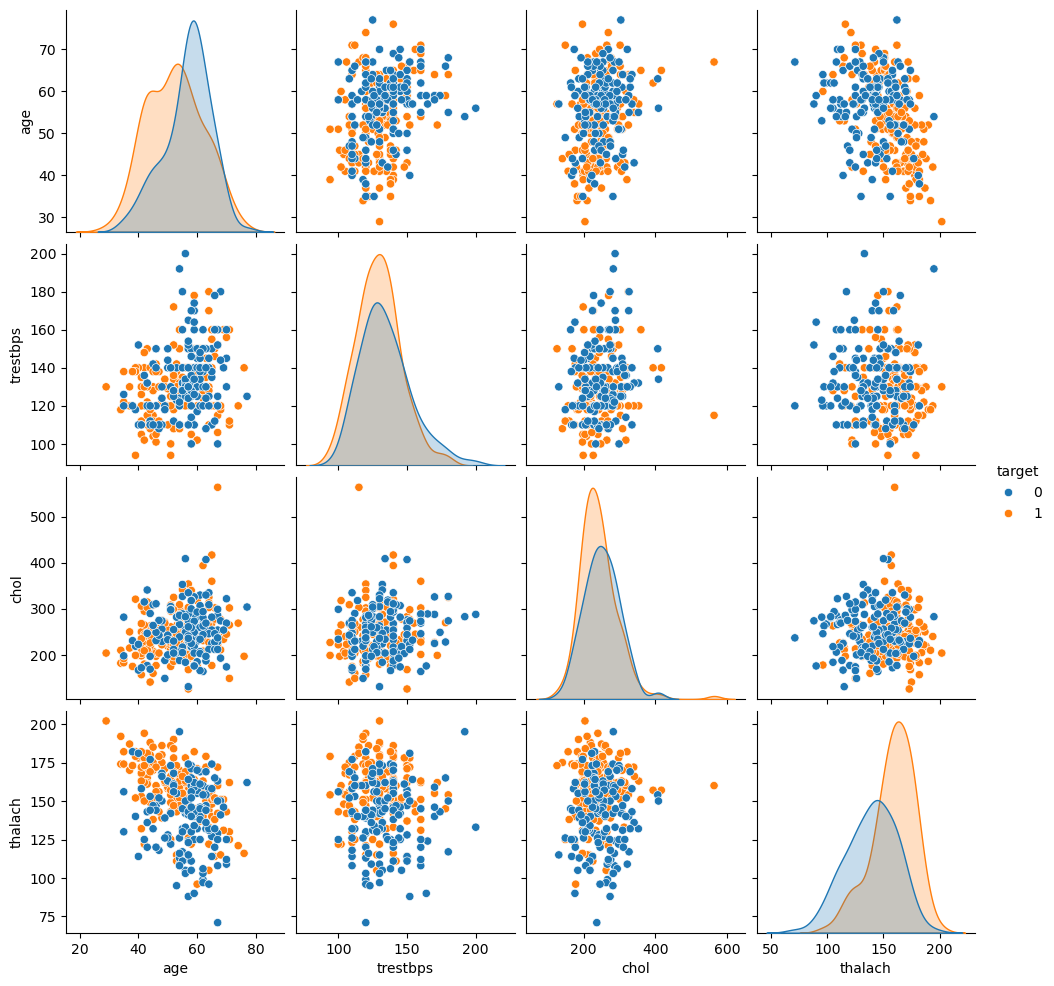

In [29]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

### 🔍 Pairplot Analysis (age, trestbps, chol, thalach)

The pairplot shows relationships between selected features colored by `target`. People with heart disease (`target=1`, orange) tend to have **lower maximum heart rate (`thalach`)** and are slightly **younger** on average. Features like `chol` and `trestbps` show **overlapping distributions** and are **less effective** in distinguishing between the two target groups. `thalach` appears to be a good predictor.


<Axes: >

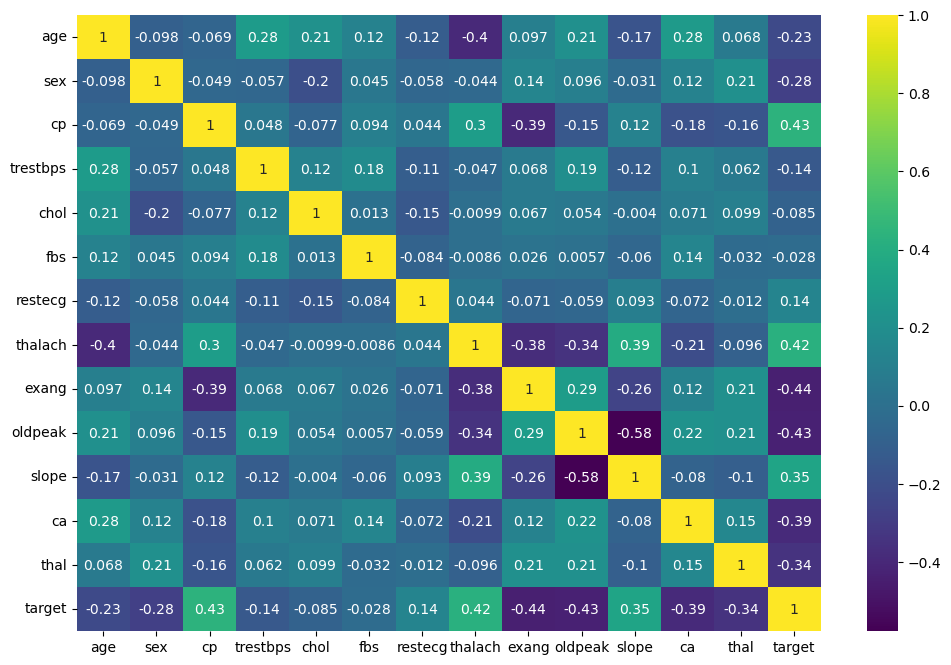

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

### Correlation Heatmap Summary

The heatmap shows feature correlations with `target`. The most positively correlated features with heart disease (`target`) are **`cp` (0.43)**, **`thalach` (0.42)**, and **`slope` (0.35)**. Negatively correlated features include **`exang` (-0.44)**, **`oldpeak` (-0.43)**, and **`ca` (-0.39)**. This suggests patients with higher chest pain type, higher heart rate, and steeper slope are more likely to have heart disease, while those with exercise-induced angina, ST depression, and more vessels colored are less likely to be healthy.


## **4. Data Preprocessing**


In [37]:
X = df.drop('target',axis=1)
y = df['target']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [43]:
scaler = StandardScaler()

In [45]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## **5. Model Training**


In [48]:
from sklearn.linear_model import LogisticRegressionCV 

In [50]:
log_model = LogisticRegressionCV()

In [52]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [54]:
log_model.C_

array([0.04641589])

In [56]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [58]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [60]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [62]:
coefs = coefs.sort_values()

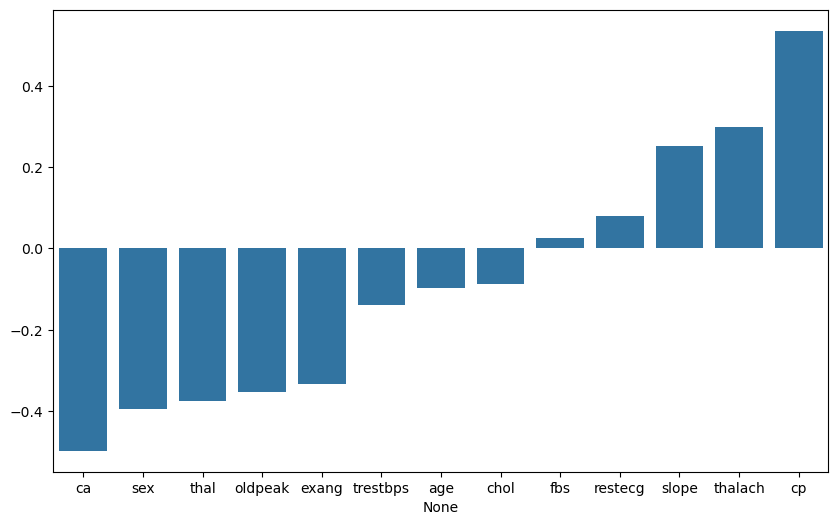

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

The barplot above displays the **coefficients of each feature** in the logistic regression model, sorted by value. These coefficients represent how each feature influences the prediction of heart disease:

- **Positive coefficients** (right bars) increase the **likelihood of heart disease** (`target = 1`).
- **Negative coefficients** (left bars) decrease the **likelihood of heart disease**.

### 🔍 Key Insights:
- **Chest pain type (`cp`)**, **maximum heart rate (`thalach`)**, and **ST segment slope (`slope`)** have the **strongest positive influence** on predicting heart disease.
- Features like **number of vessels colored (`ca`)**, **sex**, and **exercise-induced angina (`exang`)** have **strong negative coefficients**, suggesting they are associated more with **absence of heart disease** (`target = 0`).
- Some features like **fasting blood sugar (`fbs`)** and **resting ECG (`restecg`)** have **minimal impact** as their coefficients are close to zero.

This visualization helps interpret which features are most impactful in the model’s decision-making process.


## **6.Model Performance Evaluation**

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

In [71]:
y_pred = log_model.predict(scaled_X_test)

In [73]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]])

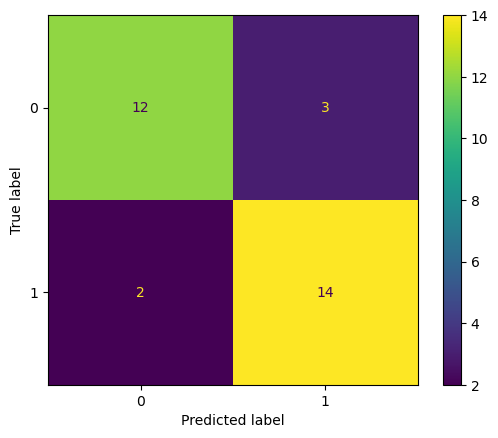

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)



- **True Positives (TP)** = 14 → correctly predicted heart disease
- **True Negatives (TN)** = 12 → correctly predicted no heart disease
- **False Positives (FP)** = 3 → predicted heart disease, but actually healthy
- **False Negatives (FN)** = 2 → predicted healthy, but actually has heart disease

### ✅ Interpretation:
- The model **correctly classified 26 out of 31** cases.
- It shows **high precision and recall** for both classes.
- Only a few misclassifications exist, with slightly more **false positives** than false negatives.

This matrix is helpful for assessing how balanced and reliable the predictions are across both classes.


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves


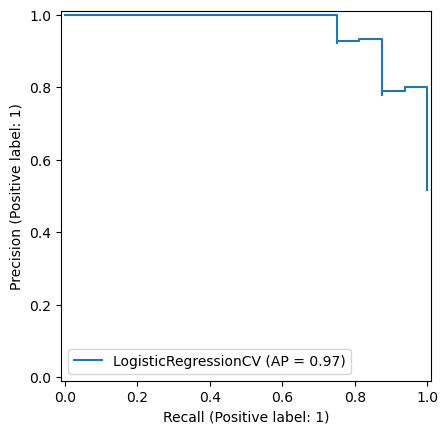

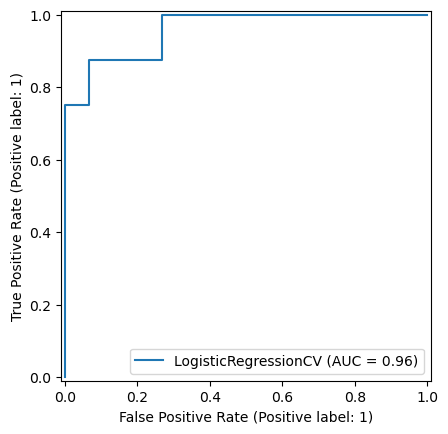

In [84]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

# ROC Curve
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)


### 🔹 Precision-Recall Curve

This curve helps evaluate model performance on **imbalanced datasets** by focusing on the positive class (`target = 1` - heart disease).

- **Precision** = TP / (TP + FP) → How many predicted positives were actually correct?
- **Recall** = TP / (TP + FN) → How many actual positives were correctly identified?

#### ✅ Interpretation:
- The curve shows **high precision and recall**, with an **Average Precision (AP) score of 0.97**, indicating the model is **very confident and accurate** when predicting heart disease.

---

### 🔸 ROC Curve (Receiver Operating Characteristic)

This curve shows the trade-off between:
- **True Positive Rate (TPR)** = Recall
- **False Positive Rate (FPR)** = FP / (FP + TN)

A **perfect model** would reach the top-left corner (TPR=1, FPR=0).

#### ✅ Interpretation:
- The curve is **close to the top-left corner**, which indicates a **strong classifier**.
- The higher the ROC AUC score, the better the model is at distinguishing between the two classes.

---

### 📌 Summary:
Both curves confirm that the logistic regression model performs **very well** on the test set, with high confidence in its predictions and great separation between classes.

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [98]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [100]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [91]:
log_model.predict(patient)

array([0])

In [93]:
log_model.predict_proba(patient)

array([[9.99999860e-01, 1.39946031e-07]])

## 🧪 Final Prediction: Does the Patient Have Heart Disease?

We tested our trained logistic regression model on a new patient with the following clinical features:

| Feature   | Value | Description |
|-----------|--------|-------------|
| Age       | 54.0   | Middle-aged |
| Sex       | 1.0    | Male |
| Chest Pain Type (`cp`) | 0.0 | Typical angina |
| Resting Blood Pressure (`trestbps`) | 122.0 | Within normal range |
| Cholesterol (`chol`) | 286.0 | Slightly high |
| Fasting Blood Sugar (`fbs`) | 0.0 | Normal |
| Resting ECG (`restecg`) | 0.0 | Normal |
| Max Heart Rate Achieved (`thalach`) | 116.0 | Below average |
| Exercise-Induced Angina (`exang`) | 1.0 | Present |
| ST Depression (`oldpeak`) | 3.2 | High depression |
| ST Slope (`slope`) | 1.0 | Flat slope |
| Major Vessels Colored (`ca`) | 2.0 | Moderate |
| Thalassemia Type (`thal`) | 2.0 | Reversible defect |

---


We used the `predict()` function to get the class prediction:

#### Model Confidence
To evaluate how confident the model is in this prediction:
log_model.predict_proba(patient)
Output: array([[9.99999860e-01, 1.39946031e-07]])

Probability of class 0 (no heart disease): 99.9999%
Probability of class 1 (heart disease): 0.00001%





## **Conclusion**

In this project, we successfully built and evaluated a logistic regression model to predict the presence of heart disease based on patient health data. Through exploratory data analysis, model training, performance evaluation, and a final real-world prediction example, we demonstrated the practical application of machine learning in healthcare. The model achieved strong performance with an accuracy of 84% and provided interpretable results through coefficient analysis and performance curves. While the model is a valuable diagnostic aid, it should always be used alongside clinical judgment. Overall, this project highlights the potential of data-driven approaches to support early diagnosis and informed decision-making in medical settings.
